## Header

In [1]:
import sys

sys.path.append(
    "/Users/cassswagner/Library/CloudStorage/OneDrive-OregonStateUniversity/oceans-research/analysis_scripts/"
)

from scipy.io import loadmat
from scipy.stats import bootstrap
from scipy import ndimage
import traceback
import pandas as pd
import numpy as np
import h5py
import oceans_sf as ocsf
import collections
from calculate_spectral_fluxes import SpectralFlux
from calculate_sfs import StructureFunctions
from flux_sf_figures import *
import flux_sf_figures
import swot_analysis as swotan
from matplotlib import pyplot as plt
import time
import xarray as xr
import cartopy.crs as ccrs
import glob
import pickle
import seaborn as sns

sns.set_style(style="white")
sns.set_context("talk")

plt.rcParams["figure.figsize"] = [9, 6]
# plt.rcParams['figure.dpi'] = 100
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("retina")
# %config InlineBackend.figure_format = 'svg'

import os

os.environ["PATH"] = os.environ["PATH"] + ":/Library/TeX/texbin"
import matplotlib as mpl

mpl.rcParams["text.usetex"] = True
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True

from geopy import distance as gd

import warnings

warnings.filterwarnings("ignore")

from astropy import units as u
from astropy import constants as c

from datetime import datetime

/Users/cassswagner/miniconda3/envs/.venv/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import importlib

if 'swotan' not in sys.modules:
    import swot_analysis as swotan            # import module on first run 
else:                      
    import swot_analysis as swotan      
    importlib.reload(swotan)

In [3]:
import swot_analysis 
importlib.reload(swot_analysis)
from swot_analysis import *

## Load and plot the data

### Pacific data

In [4]:
ds_dict = swotan.load_data(filepath='data/pacific_data/SWOT_L2_LR_SSH_Expert_001_1*.nc')

In [11]:
ds_dict['SWOT_L2_LR_SSH_Expert_001_129_20111117T134511_20111117T143638_DG10_01.nc'].u.data

AttributeError: 'Dataset' object has no attribute 'u'

In [6]:
processed_data = []
for ds_name in ds_dict:    
    ds = ds_dict[ds_name]

    try:
        ds = swotan.preprocess_dataset(ds,latmin=40,latmax=50,lonmin=0,lonmax=360)
        processed_data.append(ds)
    except:
        pass

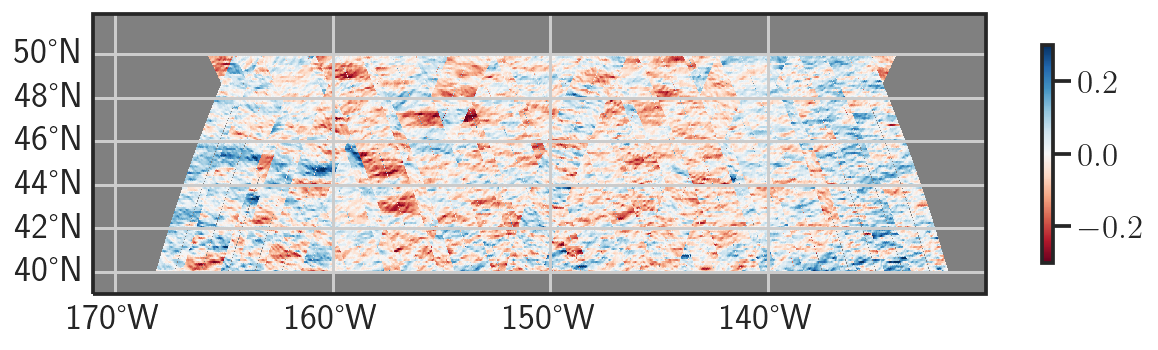

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(),facecolor='gray')
for ds in processed_data:

    p = ds.u.plot(x="longitude",y="latitude",
        subplot_kws=dict(projection=ccrs.PlateCarree(), facecolor="gray"),
        transform=ccrs.PlateCarree(),cmap='RdBu',vmin=-0.3,vmax=0.3,add_colorbar=False
    )

gl = p.axes.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right=False
ax.set_extent([-171,-130,39,50])
    # ax.streamplot(ds_ssh_true_cut_vels_rot.longitude.values,ds_ssh_true_cut_vels_rot.latitude.values,ds_ssh_true_cut_vels_rot.u.values,ds_ssh_true_cut_vels_rot.v.values,transform=ccrs.PlateCarree(),linewidth=200,density=10)
    # plt.tight_layout()
cbar = fig.colorbar(p,cmap='RdBu',shrink=0.2)
plt.show()

In [22]:
trad_sf_data_list = trad_sf(ds_dict=ds_dict,latmin=40,latmax=50,lonmin=170,lonmax=230)

Traceback (most recent call last):
  File "/Users/cassswagner/Library/CloudStorage/OneDrive-OregonStateUniversity/oceans-research/swot_sf_analysis/swot_analysis.py", line 201, in trad_sf
    ds = preprocess_dataset(ds, latmin, latmax, lonmin, lonmax)
  File "/Users/cassswagner/Library/CloudStorage/OneDrive-OregonStateUniversity/oceans-research/swot_sf_analysis/swot_analysis.py", line 130, in preprocess_dataset
    ds_cut = ds.where(
  File "/Users/cassswagner/miniconda3/envs/.venv/lib/python3.9/site-packages/xarray/core/common.py", line 1284, in where
    return ops.where_method(self, cond, other)
  File "/Users/cassswagner/miniconda3/envs/.venv/lib/python3.9/site-packages/xarray/core/ops.py", line 176, in where_method
    return apply_ufunc(
  File "/Users/cassswagner/miniconda3/envs/.venv/lib/python3.9/site-packages/xarray/core/computation.py", line 1147, in apply_ufunc
    return apply_dataset_vfunc(
  File "/Users/cassswagner/miniconda3/envs/.venv/lib/python3.9/site-packages/xarray

In [23]:
with open('sf_pickles/sf_trad_pacific_swot_data%s.pickle' %
            (datetime.today().strftime('%Y-%m-%d_%H%M%S')), 'wb') as handle:
    pickle.dump(trad_sf_data_list, handle,
                protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
adv_sf_data_list = adv_sf(ds_dict=ds_dict,latmin=40,latmax=50,lonmin=0,lonmax=360)

In [ ]:
with open('sf_pickles/sf_adv_pacific_swot_data_small%s.pickle' %
            (datetime.today().strftime('%Y-%m-%d_%H%M%S')), 'wb') as handle:
    pickle.dump(adv_sf_data_list, handle,
                protocol=pickle.HIGHEST_PROTOCOL)

### ACC Data

In [9]:
ds_dict = swotan.load_data(filepath='data/acc_data/*.nc')

KeyboardInterrupt: 

In [ ]:
processed_data = []
for ds_name in ds_dict:    
    ds = ds_dict[ds_name]

    try:
        ds = swotan.preprocess_dataset(ds,latmin=-70,latmax=-50,lonmin=0,lonmax=360)
        processed_data.append(ds)
    except:
        pass

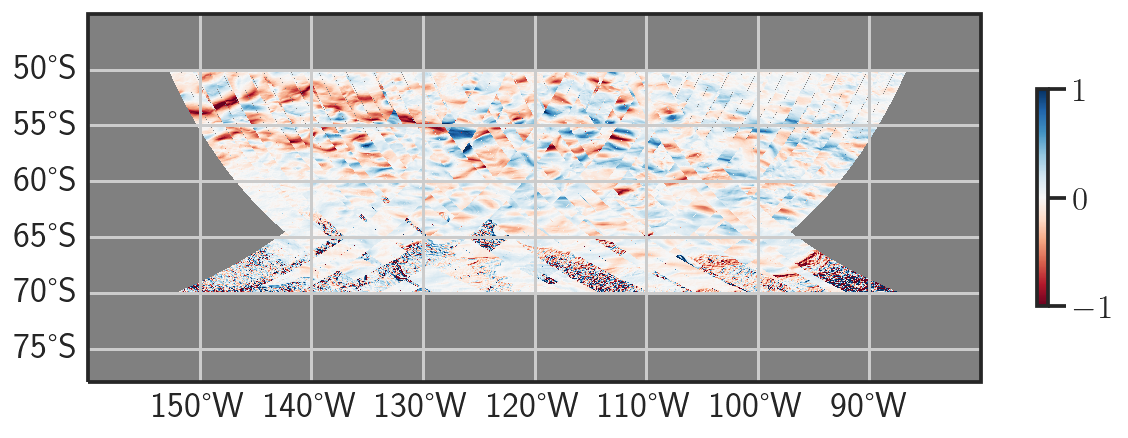

In [27]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(),facecolor='gray')
for ds in processed_data:

    p = ds.u.plot(x="longitude",y="latitude",
        subplot_kws=dict(projection=ccrs.PlateCarree(), facecolor="gray"),
        transform=ccrs.PlateCarree(),cmap='RdBu',vmin=-1,vmax=1,add_colorbar=False
    )

gl = p.axes.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right=False
ax.set_extent([-160,-80,-75,-45])
    # ax.streamplot(ds_ssh_true_cut_vels_rot.longitude.values,ds_ssh_true_cut_vels_rot.latitude.values,ds_ssh_true_cut_vels_rot.u.values,ds_ssh_true_cut_vels_rot.v.values,transform=ccrs.PlateCarree(),linewidth=200,density=10)
    # plt.tight_layout()
cbar = fig.colorbar(p,cmap='RdBu',shrink=0.2)
plt.show()

## Calculate SFs and make plots

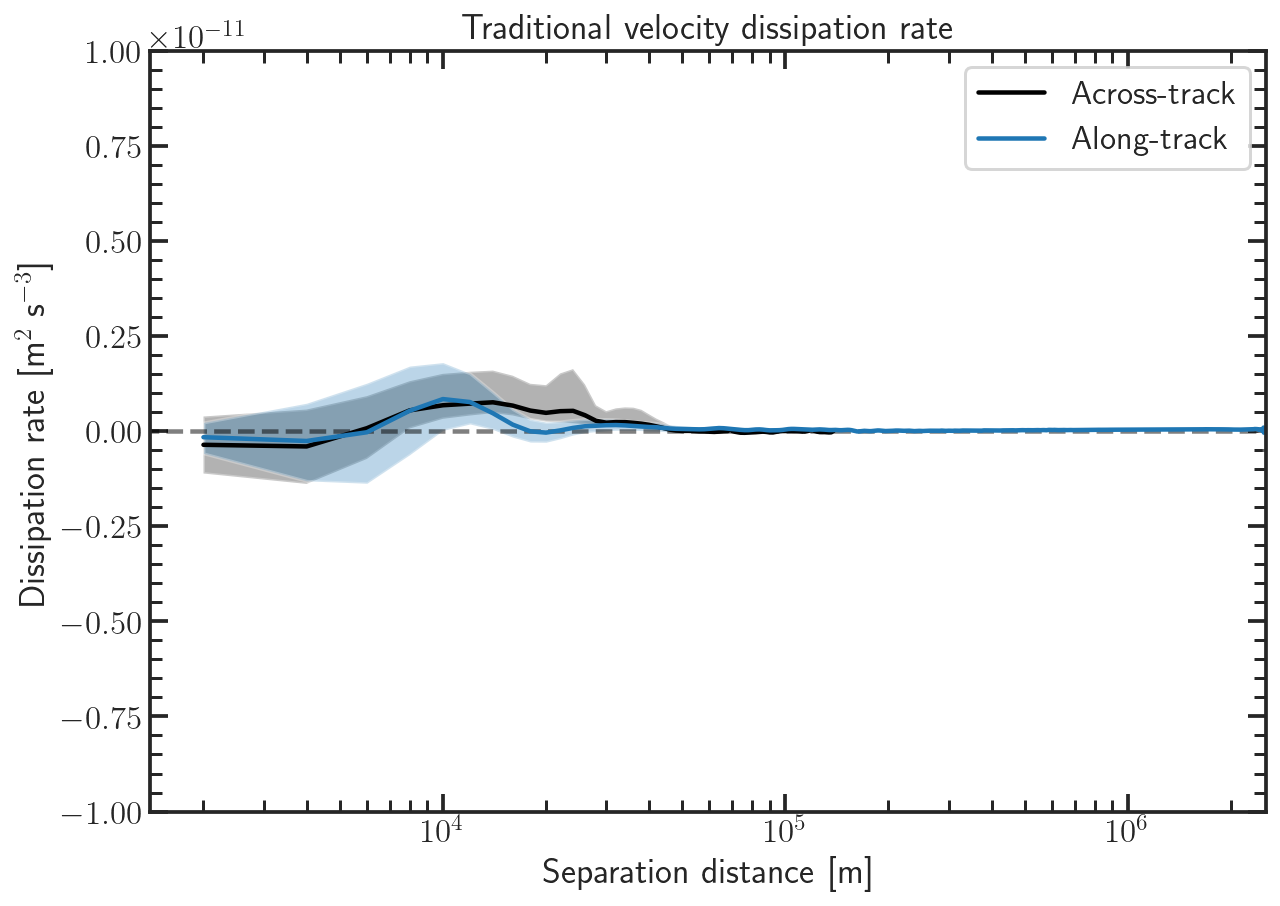

In [ ]:
trad_sf_data_list = sf_run(ds_dict=ds_dict,
                           SFtype='trad',
                           figname='swot_figures/acc_trad_%s.png' %(datetime.today().strftime('%Y-%m-%d_%H%M%S')),
                           latmin=-70,latmax=-50,lonmin=0,lonmax=360,ymin=-1e-11,ymax=1e-11)

In [ ]:
with open('sf_pickles/sf_trad_all_swot_data%s.pickle' %
            (datetime.today().strftime('%Y-%m-%d_%H%M%S')), 'wb') as handle:
    pickle.dump(trad_sf_data_list, handle,
                protocol=pickle.HIGHEST_PROTOCOL)

Text(0.5, 1.0, 'Traditional velocity dissipation rate')

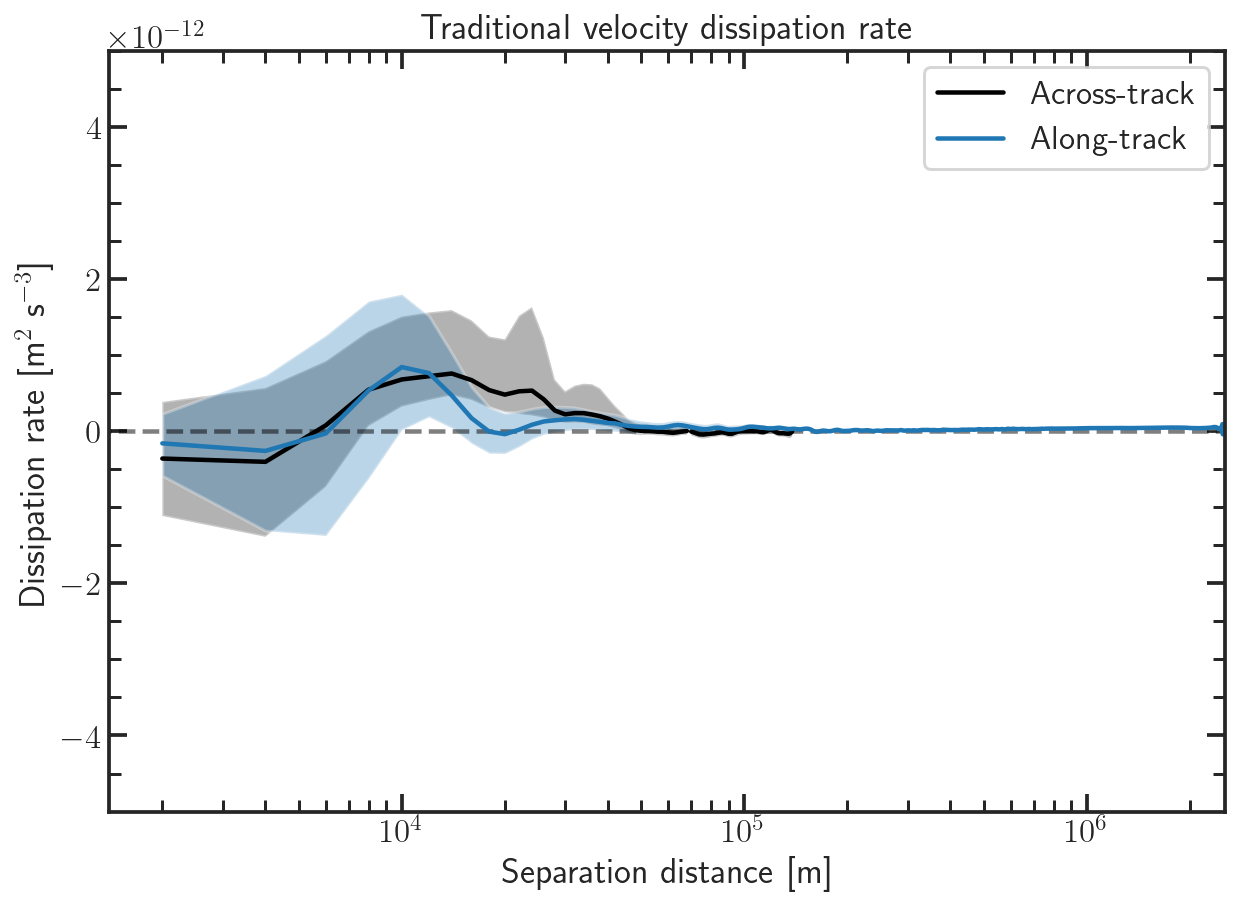

In [ ]:
SF_z_trad, SF_m_trad, xd_uneven_trad, yd_uneven_trad, boot_SF_vz_trad, boot_SF_vm_trad = trad_sf_data_list

boot_SF_vz_conf_trad = boot_SF_vz_trad.confidence_interval
boot_SF_vm_conf_trad = boot_SF_vm_trad.confidence_interval

boot_SF_vz_mean_trad = boot_SF_vz_trad.bootstrap_distribution.mean(axis=1)
boot_SF_vm_mean_trad = boot_SF_vm_trad.bootstrap_distribution.mean(axis=1)

fig, (ax1) = plt.subplots(figsize=(10, 7))

flux_sf_figures.SF_bootstrap_plot(
    (2 / 3) * boot_SF_vz_mean_trad / yd_uneven_trad,
    (2 / 3) * boot_SF_vm_mean_trad / xd_uneven_trad,
    yd_uneven_trad,
    xd_uneven_trad,
    bootz0=(2 / 3) * boot_SF_vz_conf_trad[0] / yd_uneven_trad,
    bootz1=(2 / 3) * boot_SF_vz_conf_trad[1] / yd_uneven_trad,
    bootm0=(2 / 3) * boot_SF_vm_conf_trad[0] / xd_uneven_trad,
    bootm1=(2 / 3) * boot_SF_vm_conf_trad[1] / xd_uneven_trad,
    title='Traditional velocity dissipation rate',
    label1="Across-track",
    label2="Along-track",
    ax=ax1,
)

ax1.tick_params(direction="in", which="both")
ax1.xaxis.get_ticklocs(minor=True)
ax1.set_ylim(-0.5e-11, 0.5e-11)
ax1.minorticks_on()
ax1.set_title('Traditional velocity dissipation rate')

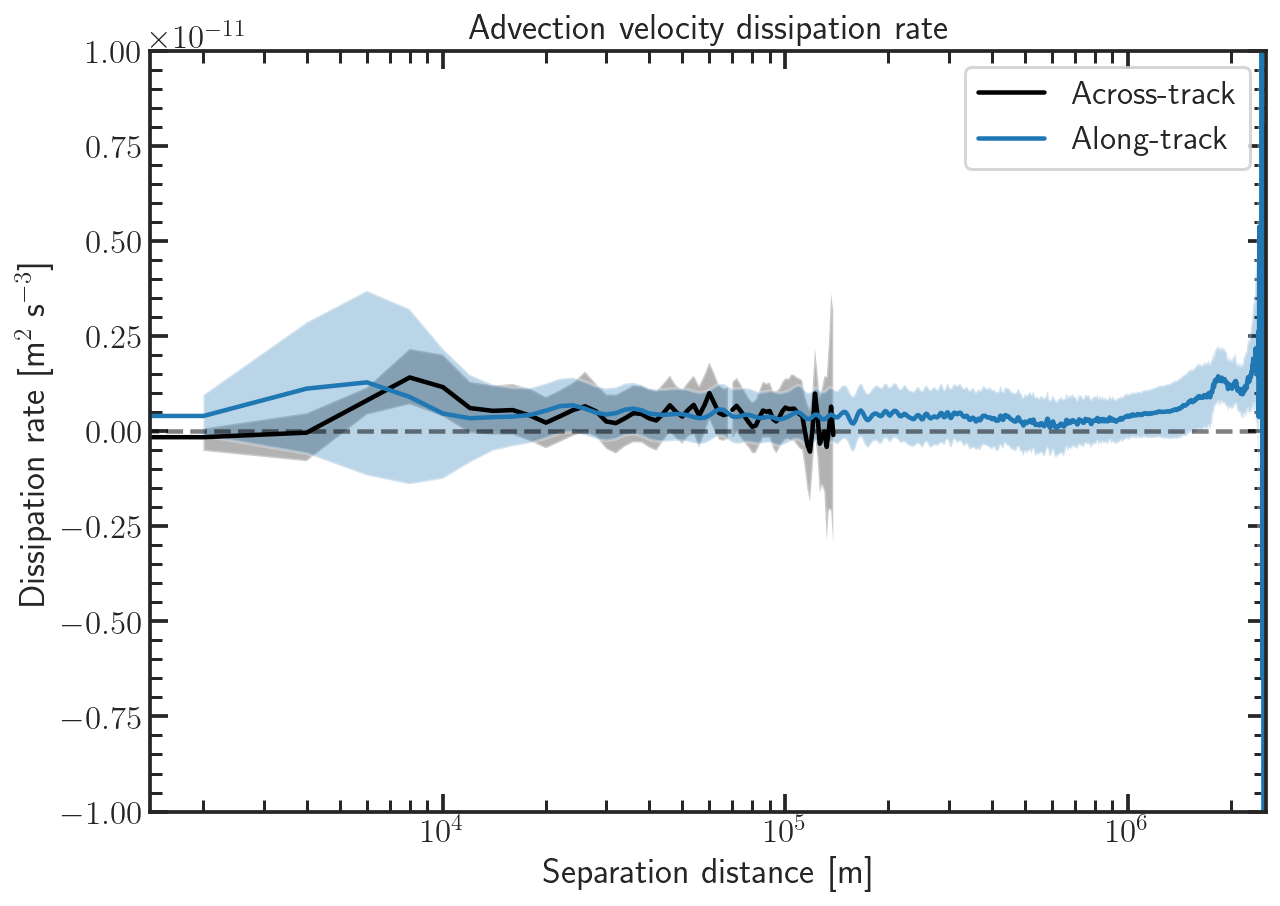

In [ ]:
adv_sf_data_list = sf_run(ds_dict=ds_dict,
                          SFtype='adv',
                          figname='swot_figures/acc_adv_%s.png' %(datetime.today().strftime('%Y-%m-%d_%H%M%S')),
                          latmin=-70,latmax=-50,lonmin=0,lonmax=360,ymin=-1e-11,ymax=1e-11)

In [ ]:
with open('sf_pickles/sf_adv_all_swot_data%s.pickle' %
            (datetime.today().strftime('%Y-%m-%d_%H%M%S')), 'wb') as handle:
    pickle.dump(adv_sf_data_list, handle,
                protocol=pickle.HIGHEST_PROTOCOL)

Text(0.5, 1.0, 'Advection velocity dissipation rate')

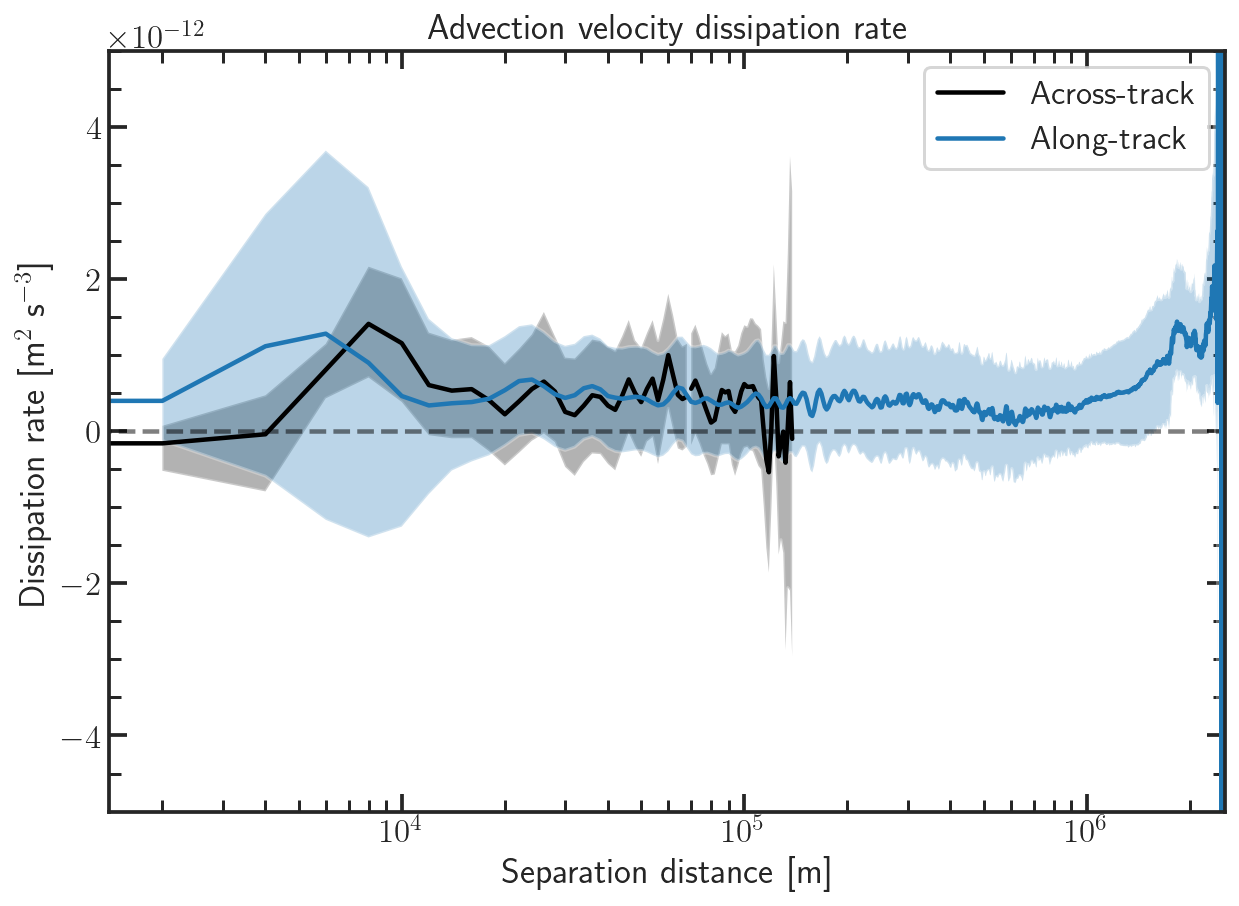

In [9]:
SF_z_adv, SF_m_adv, xd_uneven_adv, yd_uneven_adv, boot_SF_vz_adv, boot_SF_vm_adv = adv_sf_data_list

boot_SF_vz_conf_adv = boot_SF_vz_adv.confidence_interval
boot_SF_vm_conf_adv = boot_SF_vm_adv.confidence_interval

boot_SF_vz_mean_adv = boot_SF_vz_adv.bootstrap_distribution.mean(axis=1)
boot_SF_vm_mean_adv = boot_SF_vm_adv.bootstrap_distribution.mean(axis=1)

fig, (ax1) = plt.subplots(figsize=(10, 7))

flux_sf_figures.SF_bootstrap_plot(
    (1 / 2) * boot_SF_vz_mean_adv,
    (1 / 2) * boot_SF_vm_mean_adv,
    yd_uneven_adv,
    xd_uneven_adv,
    bootz0=(1 / 2) * boot_SF_vz_conf_adv[0],
    bootz1=(1 / 2) * boot_SF_vz_conf_adv[1],
    bootm0=(1 / 2) * boot_SF_vm_conf_adv[0],
    bootm1=(1 / 2) * boot_SF_vm_conf_adv[1],
    title='Advection velocity dissipation rate',
    label1="Across-track",
    label2="Along-track",
    ax=ax1,
)

ax1.tick_params(direction="in", which="both")
ax1.xaxis.get_ticklocs(minor=True)
ax1.set_ylim(-0.5e-11, 0.5e-11)
ax1.minorticks_on()
ax1.set_title('Advection velocity dissipation rate')

## Check enstrophy cascade rates

Text(0.5, 1.0, 'Advection velocity enstrophy cascade rate')

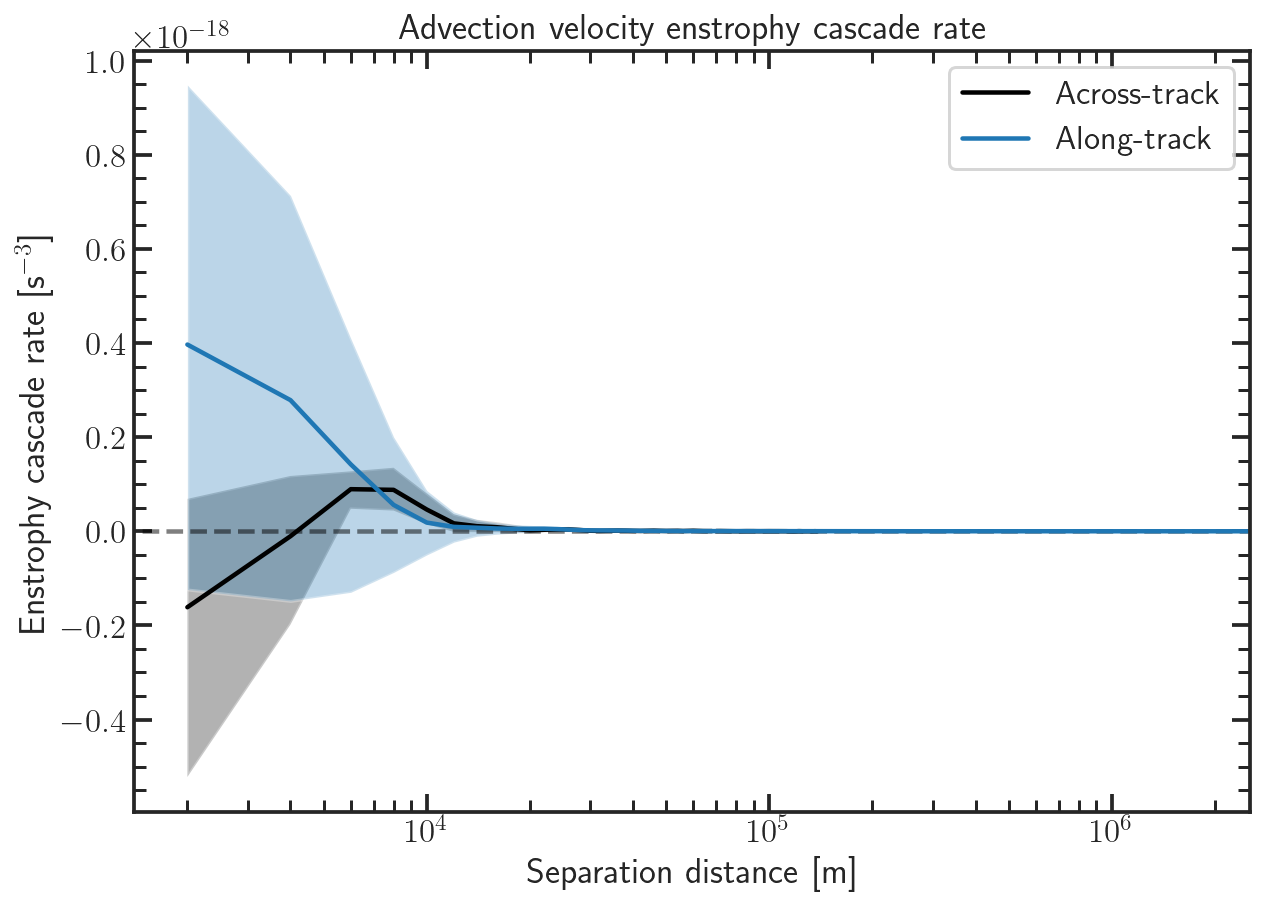

In [10]:
fig, (ax1) = plt.subplots(figsize=(10, 7))

flux_sf_figures.SF_bootstrap_plot(
    2 * boot_SF_vz_mean_adv / yd_uneven_adv**2,
    2 * boot_SF_vm_mean_adv / xd_uneven_adv**2,
    yd_uneven_adv,
    xd_uneven_adv,
    bootz0=2 * boot_SF_vz_conf_adv[0] / yd_uneven_adv**2,
    bootz1=2 * boot_SF_vz_conf_adv[1] / yd_uneven_adv**2,
    bootm0=2 * boot_SF_vm_conf_adv[0] / xd_uneven_adv**2,
    bootm1=2 * boot_SF_vm_conf_adv[1] / xd_uneven_adv**2,
    title='Advection velocity enstrophy cascade rate',
    label1="Across-track",
    label2="Along-track",
    ax=ax1,
)

ax1.tick_params(direction="in", which="both")
ax1.set_ylabel(r'Enstrophy cascade rate [s$^{-3}$]')
ax1.xaxis.get_ticklocs(minor=True)
# ax1.set_ylim(-0.5e-18, 0.5e-18)
ax1.minorticks_on()
ax1.set_title('Advection velocity enstrophy cascade rate')

Text(0.5, 1.0, 'Traditional velocity enstrophy cascade rate')

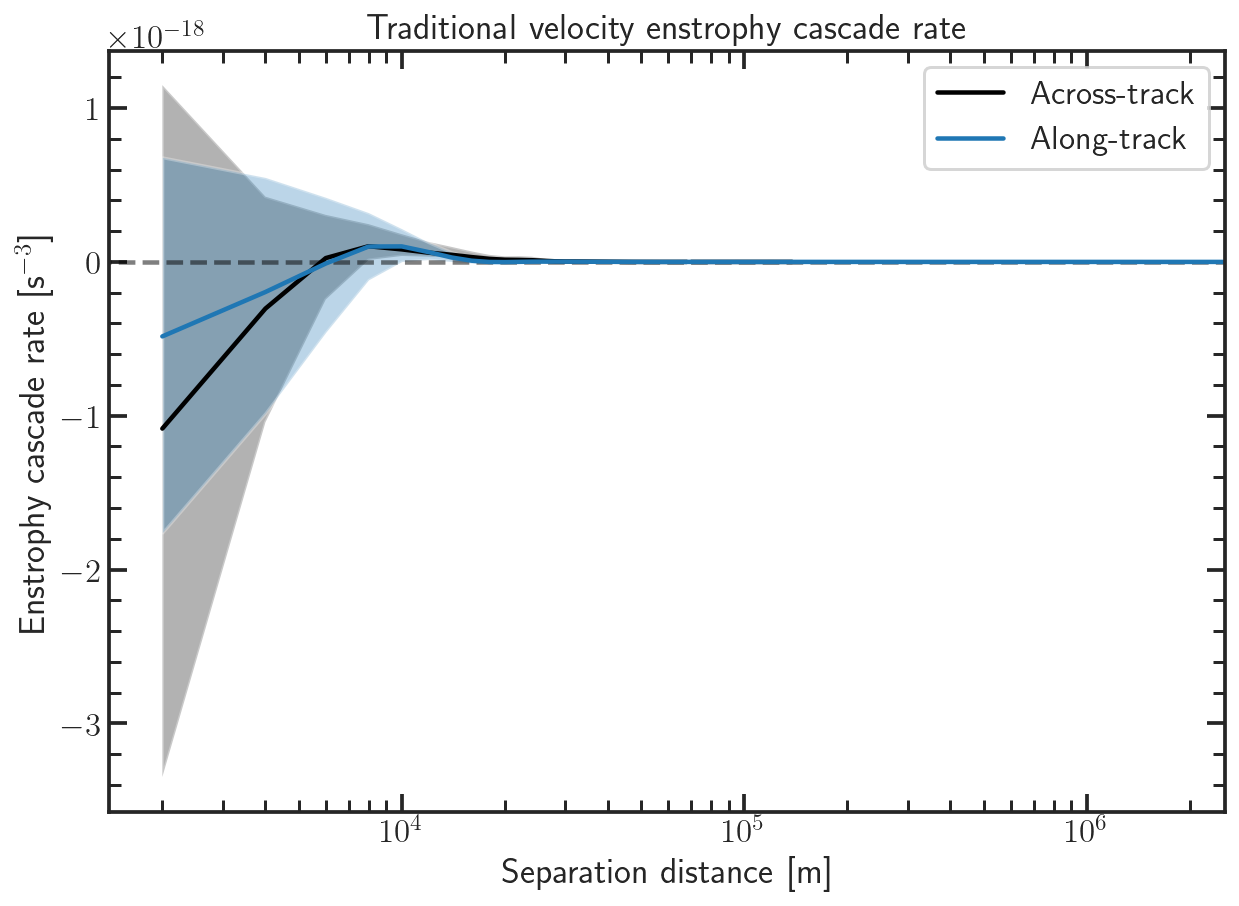

In [22]:
fig, (ax1) = plt.subplots(figsize=(10, 7))

flux_sf_figures.SF_bootstrap_plot(
    8 * boot_SF_vz_mean_trad / yd_uneven_trad**3,
    8 * boot_SF_vm_mean_trad / xd_uneven_trad**3,
    yd_uneven_trad,
    xd_uneven_trad,
    bootz0=8 * boot_SF_vz_conf_trad[0] / yd_uneven_trad**3,
    bootz1=8 * boot_SF_vz_conf_trad[1] / yd_uneven_trad**3,
    bootm0=8 * boot_SF_vm_conf_trad[0] / xd_uneven_trad**3,
    bootm1=8 * boot_SF_vm_conf_trad[1] / xd_uneven_trad**3,
    title='Traditional velocity enstrophy cascade rate',
    label1="Across-track",
    label2="Along-track",
    ax=ax1,
)

ax1.tick_params(direction="in", which="both")
ax1.xaxis.get_ticklocs(minor=True)
# ax1.set_ylim(-0.5e-21, 0.5e-21)
ax1.minorticks_on()
ax1.set_ylabel(r'Enstrophy cascade rate [s$^{-3}$]')
ax1.set_title('Traditional velocity enstrophy cascade rate')

## Log-log SF plots

Text(0.5, 1.0, 'Advection velocity structure functions')

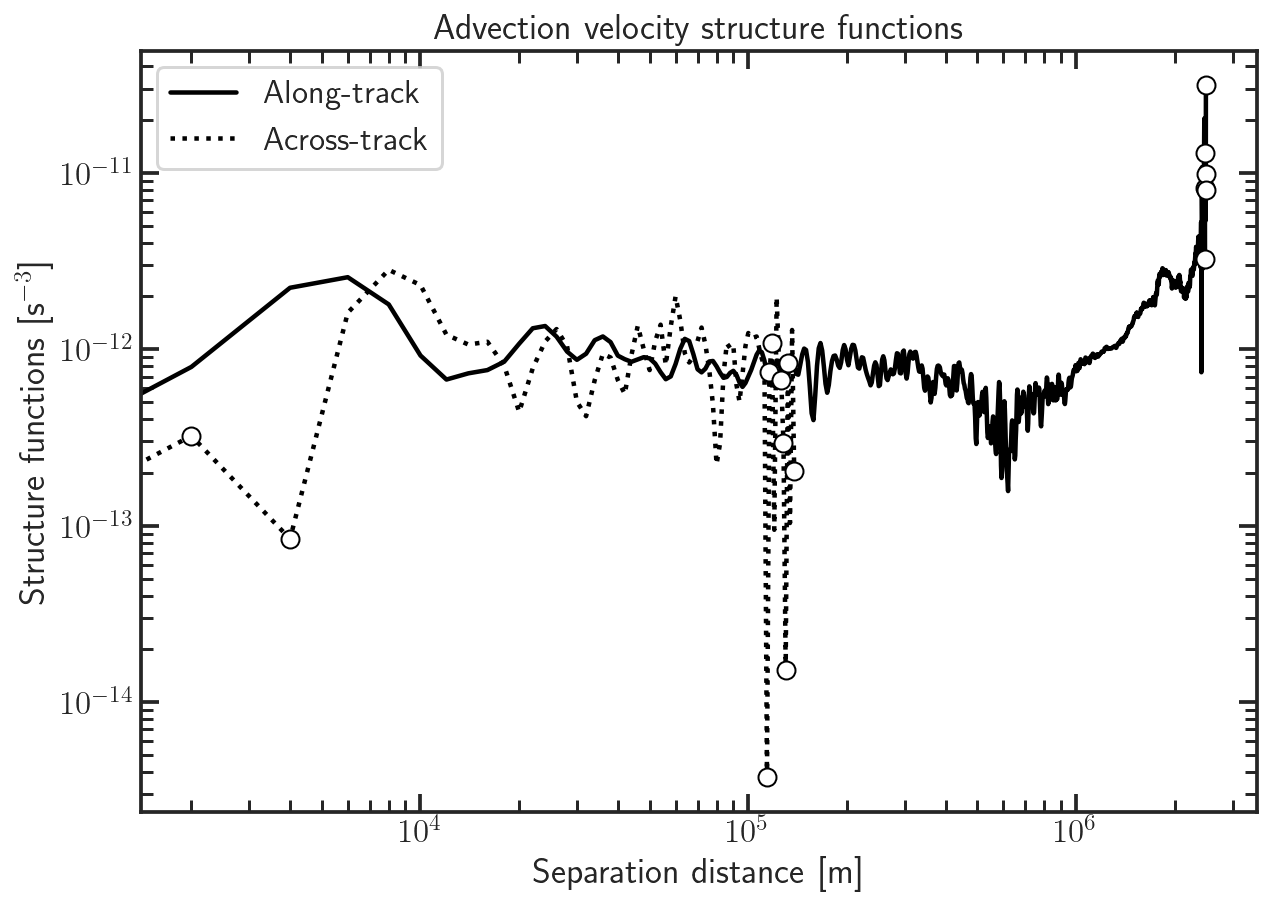

In [12]:
fig, (ax1) = plt.subplots(figsize=(10, 7))

ax1.loglog(
    xd_uneven_adv, abs(boot_SF_vm_mean_adv), color="k", label="Along-track")

ax1.loglog(xd_uneven_adv, -boot_SF_vm_mean_adv, "o", color="k", markerfacecolor='white')

ax1.loglog(
    yd_uneven_adv, abs(boot_SF_vz_mean_adv), color="k", label="Across-track", linestyle='dotted')

ax1.loglog(yd_uneven_adv, -boot_SF_vz_mean_adv, "o", color="k", markerfacecolor='white')

ax1.set_ylabel(r"Structure functions [s$^{-3}$]")
ax1.set_xlabel(r"Separation distance [m]")
ax1.legend()

ax1.tick_params(direction="in", which="both")
ax1.xaxis.get_ticklocs(minor=True)
ax1.minorticks_on()
ax1.set_title('Advection velocity structure functions')

Text(0.5, 1.0, 'Traditional velocity structure functions')

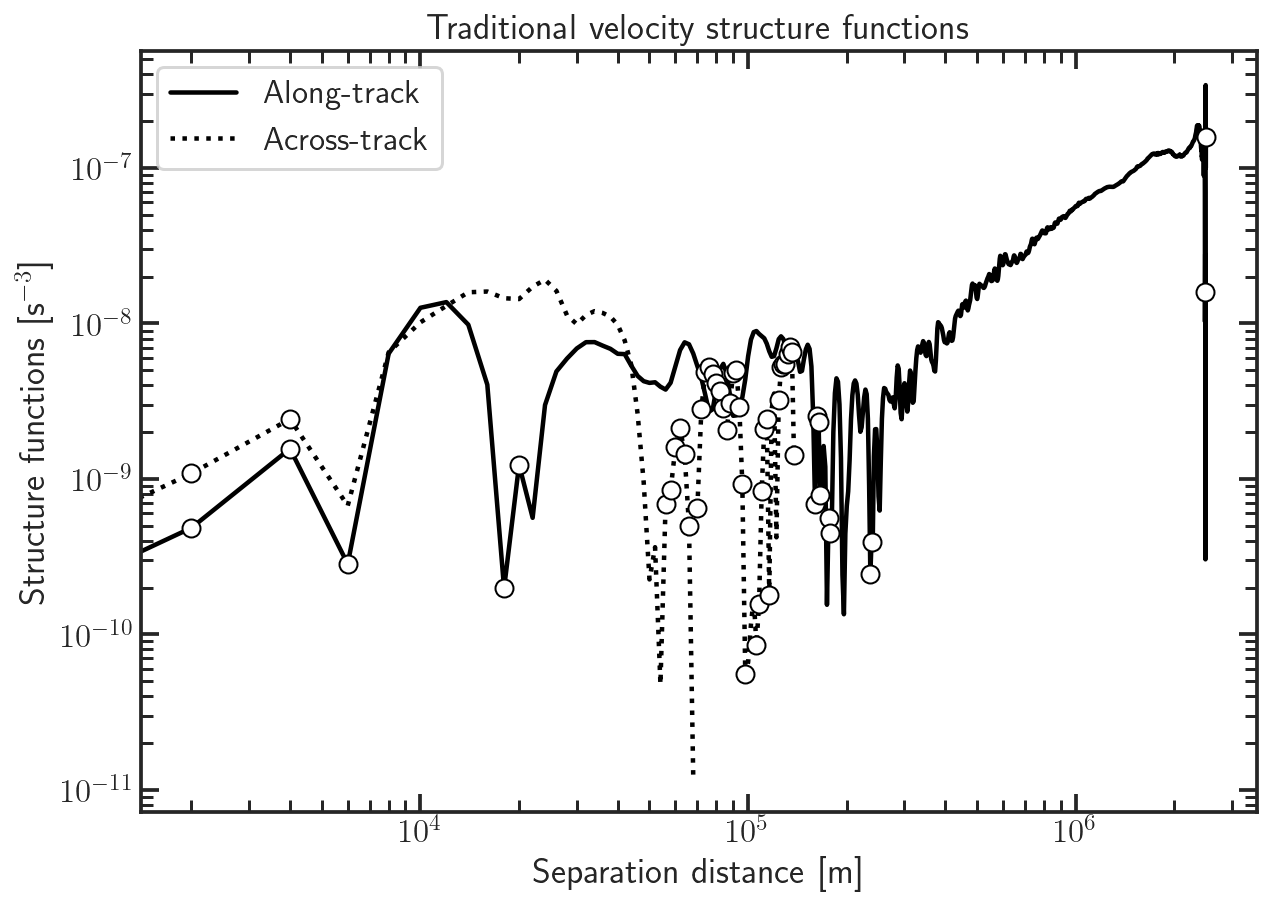

In [13]:
fig, (ax1) = plt.subplots(figsize=(10, 7))

ax1.loglog(
    xd_uneven_trad, abs(boot_SF_vm_mean_trad), color="k", label="Along-track")

ax1.loglog(xd_uneven_trad, -boot_SF_vm_mean_trad, "o", color="k", markerfacecolor='white')

ax1.loglog(
    yd_uneven_trad, abs(boot_SF_vz_mean_trad), color="k", label="Across-track", linestyle='dotted')

ax1.loglog(yd_uneven_trad, -boot_SF_vz_mean_trad, "o", color="k", markerfacecolor='white')

ax1.set_ylabel(r"Structure functions [s$^{-3}$]")
ax1.set_xlabel(r"Separation distance [m]")
ax1.legend()

ax1.tick_params(direction="in", which="both")
ax1.xaxis.get_ticklocs(minor=True)
ax1.minorticks_on()
ax1.set_title('Traditional velocity structure functions')

## Log-log enstrophy cascade rates

Text(0.5, 1.0, 'Advection velocity enstrophy cascade rate')

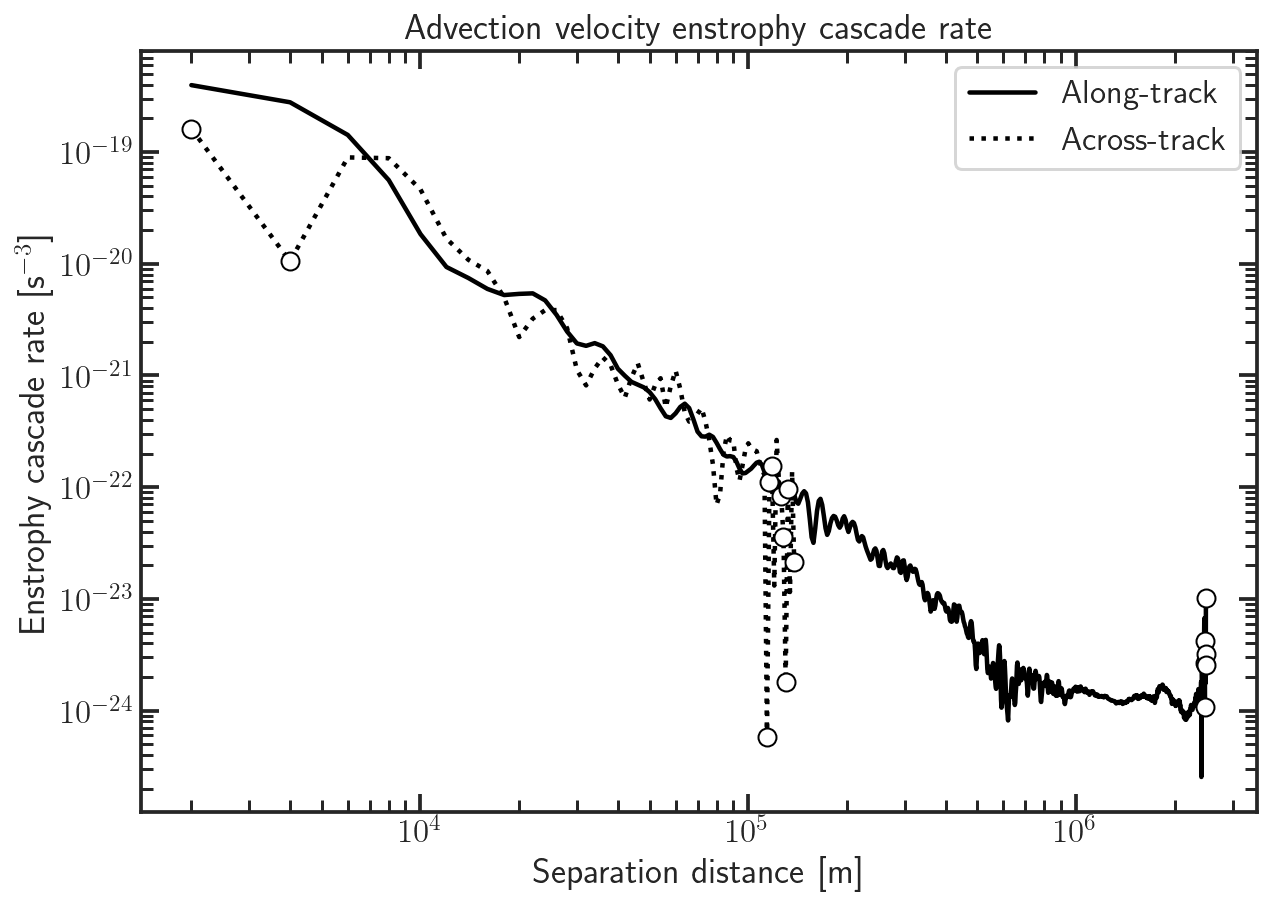

In [14]:
fig, (ax1) = plt.subplots(figsize=(10, 7))

ax1.loglog(
    xd_uneven_adv, abs(2*boot_SF_vm_mean_adv/xd_uneven_adv**2), color="k", label="Along-track")

ax1.loglog(xd_uneven_adv, -2*boot_SF_vm_mean_adv/xd_uneven_adv**2, "o", color="k", markerfacecolor='white')

ax1.loglog(
    yd_uneven_adv, abs(2*boot_SF_vz_mean_adv/yd_uneven_adv**2), color="k", label="Across-track", linestyle='dotted')

ax1.loglog(yd_uneven_adv, -2*boot_SF_vz_mean_adv/yd_uneven_adv**2, "o", color="k", markerfacecolor='white')

ax1.set_ylabel(r"Enstrophy cascade rate [s$^{-3}$]")
ax1.set_xlabel(r"Separation distance [m]")
ax1.legend()

ax1.tick_params(direction="in", which="both")
ax1.xaxis.get_ticklocs(minor=True)
ax1.minorticks_on()
ax1.set_title('Advection velocity enstrophy cascade rate')

Text(0.5, 1.0, 'Traditional velocity enstrophy cascade rate')

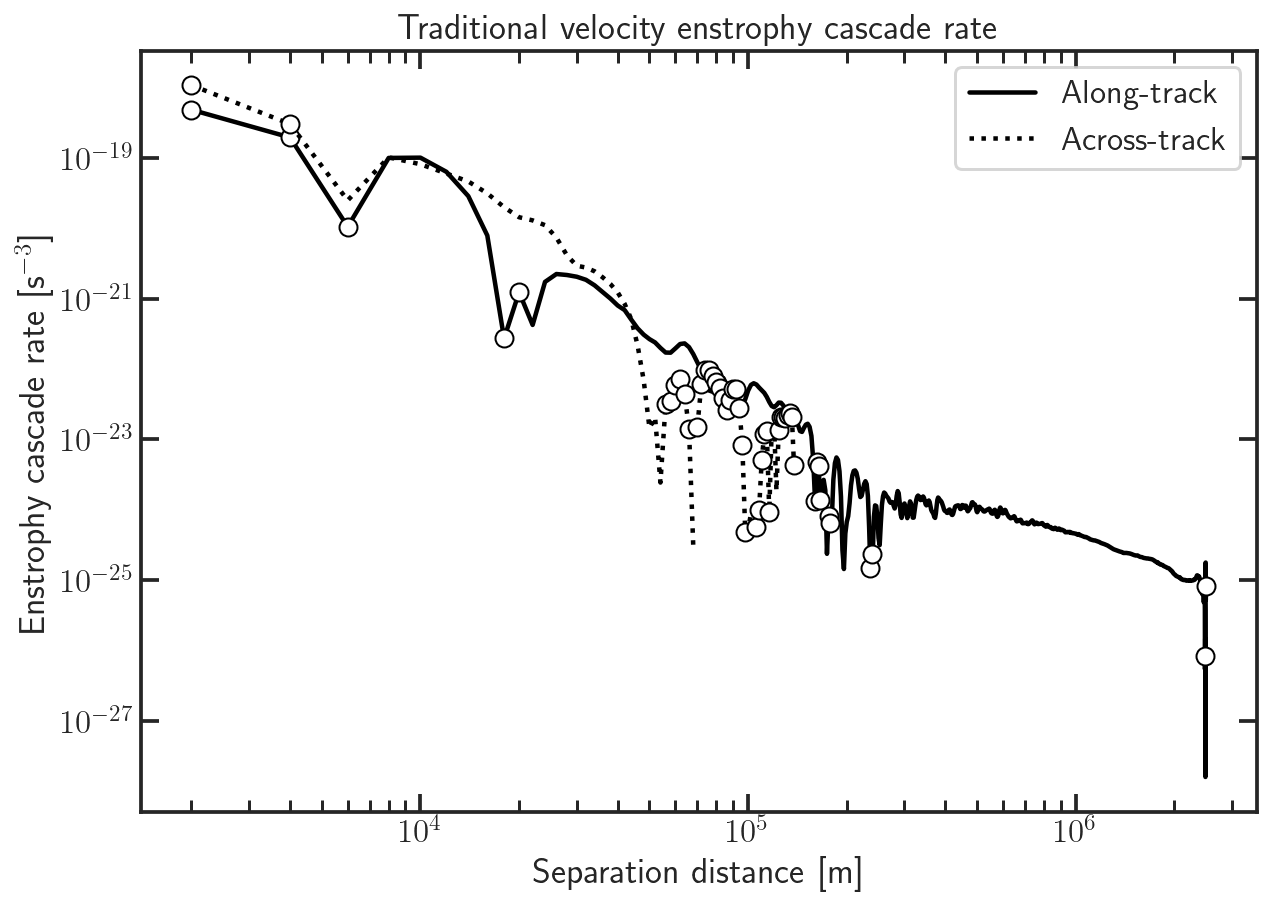

In [15]:
fig, (ax1) = plt.subplots(figsize=(10, 7))

ax1.loglog(
    xd_uneven_trad, abs(8*boot_SF_vm_mean_trad/xd_uneven_trad**3), color="k", label="Along-track")

ax1.loglog(xd_uneven_trad, -8*boot_SF_vm_mean_trad/xd_uneven_trad**3, "o", color="k", markerfacecolor='white')

ax1.loglog(
    yd_uneven_trad, abs(8*boot_SF_vz_mean_trad/yd_uneven_trad**3), color="k", label="Across-track", linestyle='dotted')

ax1.loglog(yd_uneven_trad, -8*boot_SF_vz_mean_trad/yd_uneven_trad**3, "o", color="k", markerfacecolor='white')

ax1.set_ylabel(r"Enstrophy cascade rate [s$^{-3}$]")
ax1.set_xlabel(r"Separation distance [m]")
ax1.legend()

ax1.tick_params(direction="in", which="both")
ax1.xaxis.get_ticklocs(minor=True)
ax1.minorticks_on()
ax1.set_title('Traditional velocity enstrophy cascade rate')

In [32]:
test_aluie_flux = 1 * u.W / u.m / u.km**2
test_aluie_flux

<Quantity 1. W / (km2 m)>

In [35]:
water_density = 1e3 * u.kg / u.m**3

test_aluie_ecasc = test_aluie_flux / water_density
test_aluie_ecasc.si

<Quantity 1.e-09 m2 / s3>

## Coarse-graining methods

In [67]:
def tophat_kernel(r,l,A):
    Hl = np.zeros(len(r)) / u.m**2
    for i in range(len(r)):
        if abs(r[i]) < l/2:
            Hl[i] = 1/A
        else:
            pass
    return(Hl)

def surface_area_earth(l):

    l = l.si

    A = 2 * np.pi * c.R_earth.si**2 * (1 - np.cos((l / (2 * c.R_earth.si)).value))
    return(A)

def coarse_grain(f,Gl):
    
    fl = ndimage.convolve(f,Gl, mode='constant', cval=0.0)
    return(fl)

def SFS_flux(u,ul,rho0):

    Sl = 0.5 * (np.gradient(ul) + np.gradient(ul.T))

    taul = np.mean(u * ul) - ul**2

    SFS_flux = -rho0 * np.inner(Sl,taul) 

    return(SFS_flux)

In [48]:
test_ds_acc = processed_data[0]
test_ds_acc

<xarray.Dataset>
Dimensions:                                (num_lines: 1271, num_pixels: 71,
                                            num_sides: 2)
Coordinates:
    latitude                               (num_lines, num_pixels) float64 -7...
    longitude                              (num_lines, num_pixels) float64 24...
    latitude_nadir                         (num_lines) float64 -70.4 ... -49.83
    longitude_nadir                        (num_lines) float64 250.0 ... 271.2
Dimensions without coordinates: num_lines, num_pixels, num_sides
Data variables: (12/99)
    time                                   (num_lines, num_pixels) datetime64[ns] ...
    time_tai                               (num_lines, num_pixels) datetime64[ns] ...
    ssh_karin                              (num_lines, num_pixels) float64 na...
    ssh_karin_uncert                       (num_lines, num_pixels) float32 na...
    ssha_karin                             (num_lines, num_pixels) float64 na...
    ssh_karin_2                            (num_lines, num_pixels) float64 na...
    ...                                     ...
    u                                      (num_lines, num_pixels) float64 -0...
    v                                      (num_lines, num_pixels) float64 na...
    w                                      (num_lines, num_pixels) float64 na...
    div                                    (num_lines, num_pixels) float64 na...
    adv_e                                  (num_lines, num_pixels) float64 na...
    adv_n                                  (num_lines, num_pixels) float64 na...
Attributes: (12/32)
    Conventions:                CF-1.7
    title:                      Level 2 Low Rate Sea Surface Height Data Prod...
    institution:                CNES/JPL
    source:                     Simulate product
    history:                    2021-09-23 09:01:53Z : Creation
    platform:                   SWOT
    ...                         ...
    right_last_longitude:       6.1365570677420305
    right_last_latitude:        77.03341180706657
    wavelength:                 0.008385803020979
    orbit_solution:             POE
    ellipsoid_semi_major_axis:  6378137.0
    ellipsoid_flattening:       0.0033528106647474805

In [51]:
test_r_acc = test_ds_acc.num_lines.values * 2000 * u.km
test_r_acc

<Quantity [0.000e+00, 2.000e+03, 4.000e+03, ..., 2.536e+06, 2.538e+06,
           2.540e+06] km>

In [55]:
test_l_acc = 5e4 * u.km
test_l_acc

<Quantity 50000. km>

In [56]:
test_area_acc = surface_area_earth(test_l_acc)
test_area_acc

<Quantity 4.37657785e+14 m2>

In [62]:
test_tophat_acc = tophat_kernel(test_r_acc.si,test_l_acc.si,test_area_acc.si)
test_tophat_acc

<Quantity [2.28489023e-15, 2.28489023e-15, 2.28489023e-15, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00] 1 / m2>

In [74]:
test_ul = coarse_grain(test_tophat_acc, (test_ds_acc.u[:,0].values * u.cm / u.s).si)
test_ul

array([6.08306828e-17, 6.18548200e-17, 6.29691816e-17, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [70]:
np.shape(test_tophat_acc)

(1271,)

In [72]:
np.shape(test_ds_acc.u[:,0])

(1271,)